# Chapter 02 : 사이킷런으로 시작하는 머신러닝
## 01 사이킷런 소개와 특징
### 사이킷런 ?

> Scikit-learn : 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리

- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉬운 API를 제공
- 다양한 머신러닝용 알고리즘과 개발에 편리한 프레임워크/API 제공

In [1]:
# 임포트
import sklearn

print(sklearn.__version__)

0.23.2


## 02 첫 번째 머신러닝 - 붓꽃 품종 예측하기

- Iris 데이터세트로 붓꽃의 품종을 분류(Classification)한다. 

> 분류(Classification) : 대표적인 Supervised Learning - 학습을 위한 다양한 피처와 분류 결정값인 Label 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블 예측 (명확한 정답이 주어진 데이터를 먼저 학습 -> 미지의 정답 예측)

- 학습 데이터 세트, ML 모델의 예측 성능을 평가하기 위해 별도의 테스트 데이터 세트로 구분
- DecisionTreeClassifier 적용

> 붓꽃 데이터 세트로 분류를 예측하는 프로세스
>
> 1. 데이터 세트 분리
> 2. 모델 학습
> 3. 예측 수행
> 4. 평가

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가진다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가진다.
iris_label = iris.target
print('iris data : ', iris_data)
print('iris target값 : ', iris_label)
print('iris target명 : ', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris data :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**학습용 데이터와 테스트용 데이터 분리**
- train_test_split()
- test_size = 0.2 : 테스트 데이터 20%, 학습 데이터 80%로 분할
- random_state = : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size=0.2, random_state=11)

**의사 결정 트리를 이용한 학습과 예측 수행**

In [6]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [8]:
# DecisionTreeClassifier의 예측 성능 평가
# 예측한 붓꽃 품종과 실제 테스트 데이터의 붓꽃 품종이 얼마나 일치하는지 확인
# accuracy_score() : 정확도 측정을 위한 함수
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


## 03 사이킷런의  기반 프레임워크 익히기
### Estimator 이해 및 fit(), predict() 메서드


> Estimator : Classifier + Regressor
>
> Classifier : 분류 알고리즘을 구현한 클래스
>
> Regressor : 회귀 알고리즘을 구현한 클래스

> fit() : ML 모델 학습 메서드
>
> predict() : 학습된 모델의 예측 메서드

- cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝 클래스의 경우 Estimator를 인자로 받는다.
- 이들 함수 내에서 Estimator의 fit()과 predict()를 호출해 평가를 하거나 하이퍼 파라미터 튜닝을 수행한다.

### 사이킷런의 주요 모듈

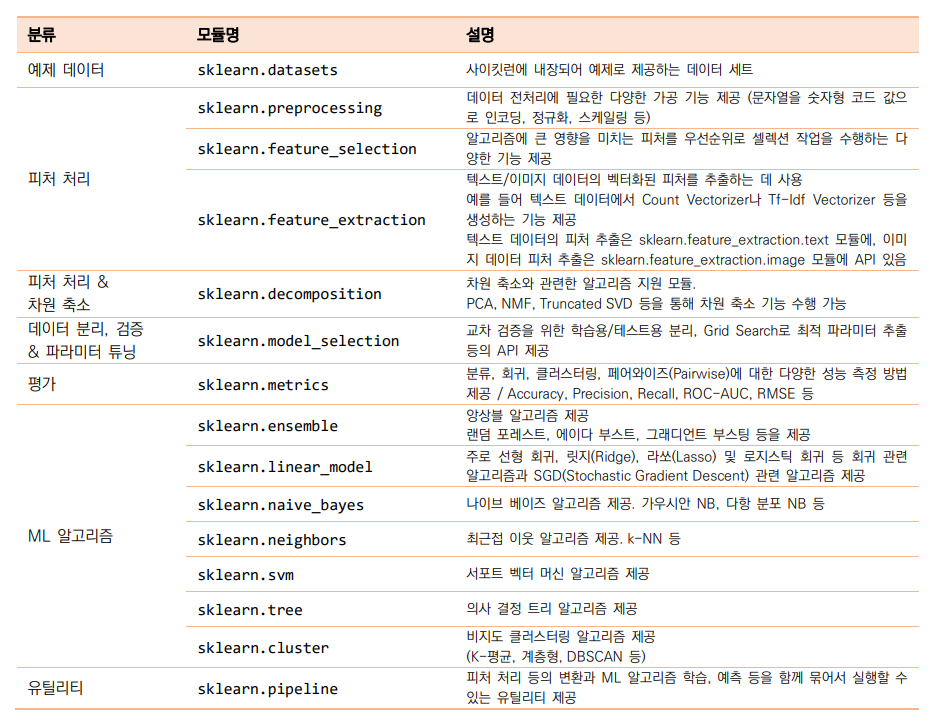

In [11]:
from IPython.display import Image
Image('C:/DATA_WORKS/PYTHON_WORKS/ml_guide/img/sklearn_modules.png', width=900)

### 내장 예제 데이터 세트
- datasets.load_boston() : 회귀 / 보스턴 집 feature들과 가격에 대한 dataset
- datasets.load_breast_cancer() : 분류 / 위스콘신 유방암 feature들과 악성/음성 레이블 dataset
- datasets.load_diabetes() : 회귀 / 당뇨 dataset
- datasets.load_digits() : 분류 / 9에서 9까지의 숫자 이미지 픽셀 dataset
- datasets.load_iris() : 분류 / 붓꽃에 대한 feature를 가진 dataset


fetch 계열의 명령은 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장. 최초 사용시 인터넷 연결 필요
- fetch_covtype() : 회귀 / 토지 조사 자료
- fetch_20newsgroups : 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces() : 얼굴 이미지 자료
- fetch_lfw_people() : 얼굴 이미지 자료
- fetch_lfw_pairs() : 얼굴 이미지 자료
- fetch_rcv1() : 로이터 뉴스 말뭉치
- fetch_mldata() : ML 웹사이트에서 다운로드

분류와 클러스터링을 위한 표본 데이터 생성기
- datasets.make_classifications() : 분류를 위한 dataset을 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성한다.
- datasets.make_blobs() : 클러스터링을 위한 dataset을 무작위 생성한다. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 dataset을 쉽게 만들 수 있다.

내장 데이터 세트(일반적으로 dictionary 형)의 키
- data : 피처의 데이터 세트 -> ndarray
- target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트 -> ndarray
- target_names : 개별 레이블의 이름 -> ndarray 또는 파이썬 list
- feature_names : 피처의 이름 -> ndarray 또는 파이썬 list
- DESCR : 데이터 세트에 대한 설명과 각 피처의 설명 -> 스트링 타입

In [12]:
# 붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


- Bunch class는 파이썬 딕셔너리 자료형과 유사하다.

In [18]:
# load_iris() 데이터 세트의 key 값 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ', keys)

붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [33]:
# target_names, target, feature_names, data의 형태와 타입 확인
print("iris_data.target_names / iris_data['target_names'] : \n", iris_data['target_names'])
print('target_names type : ', type(iris_data.target_names))

print("\n iris_data.target / iris_data['target'] : \n", iris_data['target'])
print('target type : ', type(iris_data.target))

print("\n iris_data.feature_names / iris_data['feature_names'] : \n", iris_data['feature_names'])
print('feature_names type : ', type(iris_data.feature_names))

print("\n iris_data.data / iris_data['data'] : \n", iris_data['data'])
print('data type : ', type(iris_data.data))

iris_data.target_names / iris_data['target_names'] : 
 ['setosa' 'versicolor' 'virginica']
target_names type :  <class 'numpy.ndarray'>

 iris_data.target / iris_data['target'] : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target type :  <class 'numpy.ndarray'>

 iris_data.feature_names / iris_data['feature_names'] : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_names type :  <class 'list'>

 iris_data.data / iris_data['data'] : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3

## 04 Model Selection 모듈 소개
- Model Selection 모듈 : 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


- 이미 학습한 데이터 세트를 기반으로 다시 예측 수행 시, 예측 정확도가 1.0으로 도출
- 따라서, 트레인/테스트 데이터 세트를 분리해 예측해야 한다.

sklearn.model_selection 모듈에서 train_test_split을 로드 : 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트 입력. 아래는 선택적 파라미터
- test_size : default = 0.25
- train_size : test_size 파라미터를 통상적으로 사용하기 때문에 잘 사용되지 않음
- shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 여부 결정. default = True
- random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size = 0.3, random_state = 121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


### 교차 검증
> 과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적화되어, 다른 데이터로 예측 수행시 예측 성능이 과도하게 떨어지는 현상

- 교차 검증 : 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행